In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Install libraries

```bash
conda create -n edu4 python=3.11 jupyter matplotlib
```

```bash 
! pip install -U -r requirements.txt
```

```bash
! pip install -U numpy
! pip install -U scikit-learn
```

In [2]:
! ls

data                         lattice_visualizations.ipynb


In [3]:
! pip install -U -r ../requirements.txt

## Update repository

In [4]:
! git pull

Already up to date.


## Add import path

In [5]:
import os
import sys
import gc

In [6]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
del module_path

## Organize imports

In [8]:
import multiprocessing
from pathlib import Path

In [9]:
import seaborn as sns

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (MaxAbsScaler, StandardScaler, LabelEncoder,
                                   PolynomialFeatures, SplineTransformer)
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             classification_report, confusion_matrix)

In [67]:
from sklearn.datasets import load_iris

In [68]:
! pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:01:01


In [70]:
import plotly.express as px

#### Number of CPU cores

In [71]:
workers = multiprocessing.cpu_count()
workers

8

## Initialize path

In [13]:
DATA = Path('data')
PATH = DATA / 'log_regr_lda_qda_np'
LR_PATH = DATA / 'linear_regression'
PUMPKIN_DIR = PATH / 'Pumpkin_Seeds_Dataset'
IRIS_DIR = PATH / 'iris'
PUMPKIN_DIR.mkdir(exist_ok=True, parents=True)
IRIS_DIR.mkdir(exist_ok=True, parents=True)

In [14]:
! ls

data                         lattice_visualizations.ipynb


## Load IRIS dataset

In [15]:
SEED = 2024

In [16]:
iris_data = load_iris()

In [17]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Load dataset

In [19]:
! ls {IRIS_DIR}

Iris.csv        database.sqlite


In [20]:
df = pd.read_csv(IRIS_DIR / 'Iris.csv')

In [21]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [22]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [23]:
le = LabelEncoder()

In [24]:
iris_labels = le.fit_transform(df.Species)

In [25]:
df.loc[:, 'labels'] = iris_labels

In [26]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  labels  
0       Iris-setosa       0  
1       Iris-setosa       0  
2       Iris-setosa       0  
3       Iris-setosa       0  
4       Iris-setosa       0  
..              ...     ...  
145  Iris-virginica       2  
146  Iris-virginica       2  
147  Iris-virginica       2  
148  Iris-virginica       2  
149  Iris-virginica       2  

[150 rows x 7 columns]

In [27]:
y = df['labels']
X = df.drop(columns=['Id', 'Species', 'labels'], axis=1)
X.shape, y.shape, df['Species'].value_counts(), df['labels'].value_counts()

((150, 4),
 (150,),
 Species
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: count, dtype: int64,
 labels
 0    50
 1    50
 2    50
 Name: count, dtype: int64)

```python
# #define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']
X.shape, y.shape
```

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)

In [29]:
X_train

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
16             5.4           3.9            1.3           0.4
140            6.7           3.1            5.6           2.4
104            6.5           3.0            5.8           2.2
124            6.7           3.3            5.7           2.1
89             5.5           2.5            4.0           1.3
..             ...           ...            ...           ...
36             5.5           3.5            1.3           0.2
27             5.2           3.5            1.5           0.2
128            6.4           2.8            5.6           2.1
96             5.7           2.9            4.2           1.3
136            6.3           3.4            5.6           2.4

[120 rows x 4 columns]

#### Scale the features

In [30]:
scaler = MaxAbsScaler()

In [31]:
X_trnrm = scaler.fit_transform(X_train)

In [32]:
X_tenrm = scaler.transform(X_test)

## Visualize dataset

In [33]:
for x in X_trnrm:
    print(x)

[0.6835443  0.92857143 0.19402985 0.16      ]
[0.84810127 0.73809524 0.8358209  0.96      ]
[0.82278481 0.71428571 0.86567164 0.88      ]
[0.84810127 0.78571429 0.85074627 0.84      ]
[0.69620253 0.5952381  0.59701493 0.52      ]
[0.79746835 0.5952381  0.73134328 0.6       ]
[0.58227848 0.80952381 0.20895522 0.12      ]
[0.83544304 0.69047619 0.68656716 0.52      ]
[0.91139241 0.71428571 0.86567164 0.64      ]
[0.64556962 0.9047619  0.28358209 0.16      ]
[0.73417722 0.64285714 0.6119403  0.4       ]
[0.7721519  0.61904762 0.8358209  0.56      ]
[0.62025316 0.73809524 0.2238806  0.04      ]
[0.64556962 0.9047619  0.2238806  0.12      ]
[0.65822785 0.97619048 0.2238806  0.04      ]
[0.63291139 0.71428571 0.23880597 0.08      ]
[0.72151899 0.61904762 0.52238806 0.4       ]
[0.55696203 0.71428571 0.19402985 0.08      ]
[0.6835443  0.71428571 0.67164179 0.6       ]
[0.6835443  0.92857143 0.25373134 0.16      ]
[0.63291139 0.80952381 0.23880597 0.16      ]
[0.83544304 0.71428571 0.65671642 

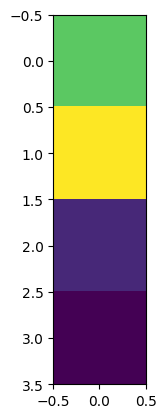

In [34]:
plt.imshow(np.expand_dims(X_tenrm[0], axis=1)) 
plt.show()

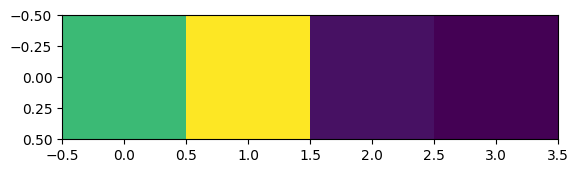

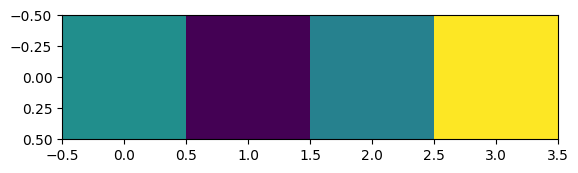

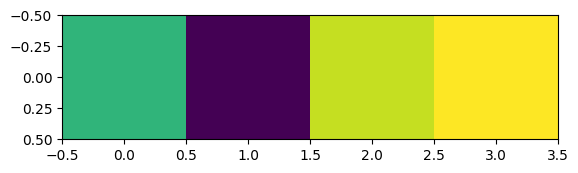

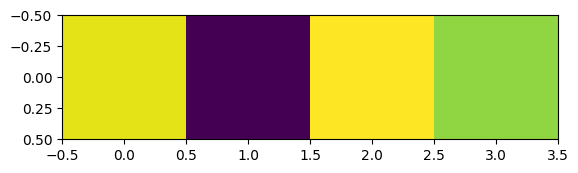

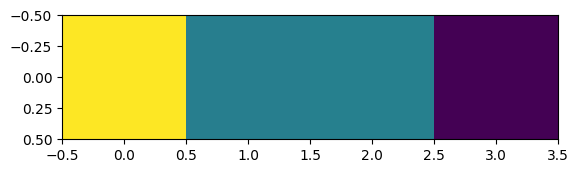

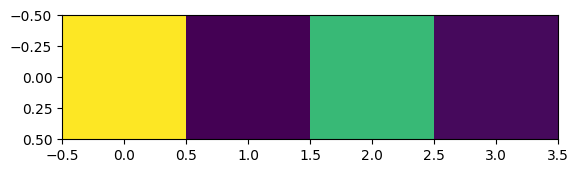

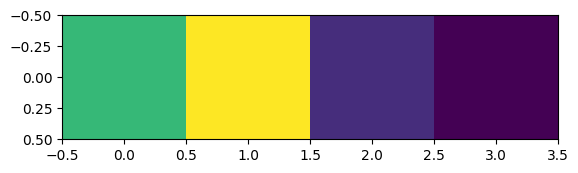

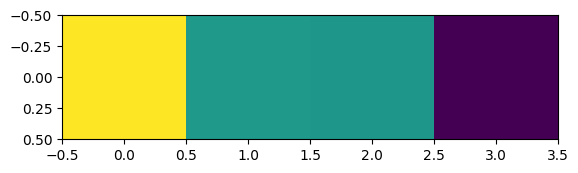

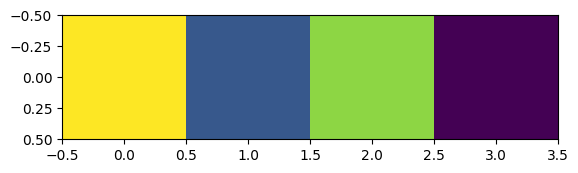

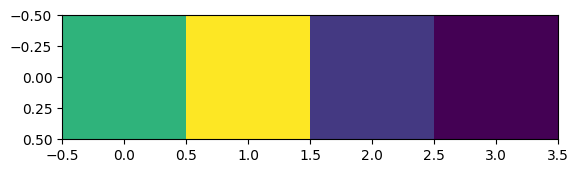

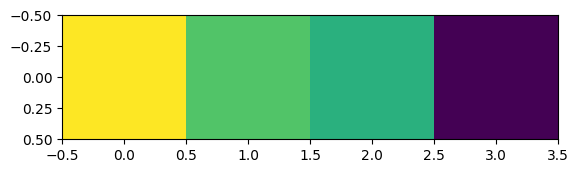

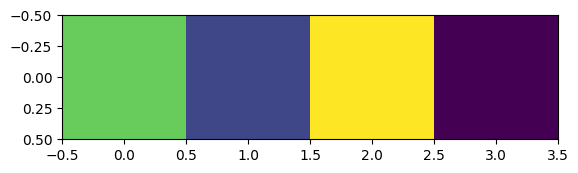

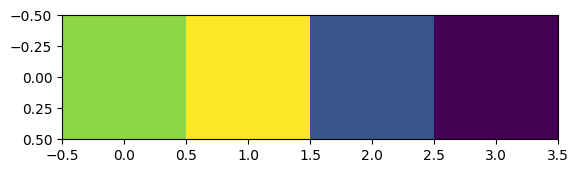

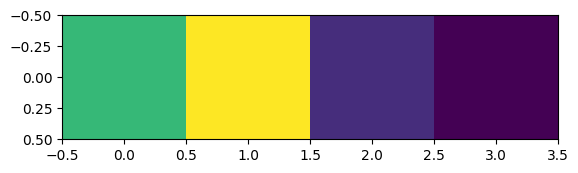

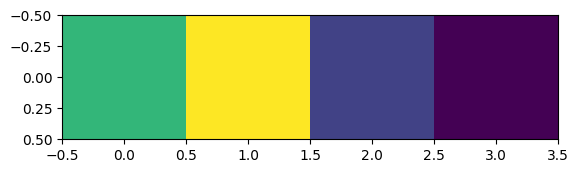

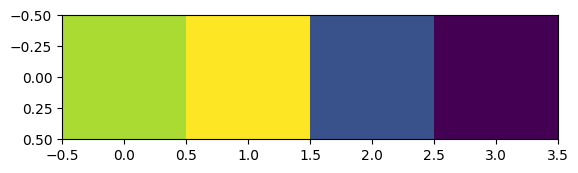

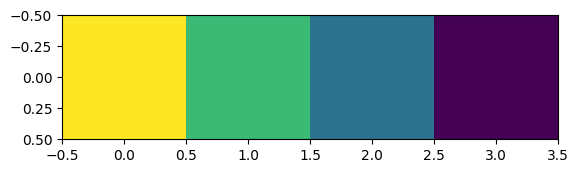

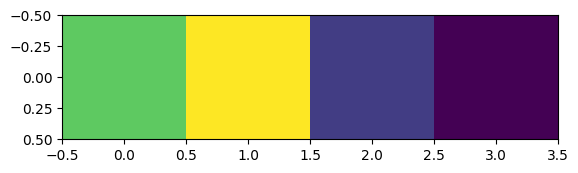

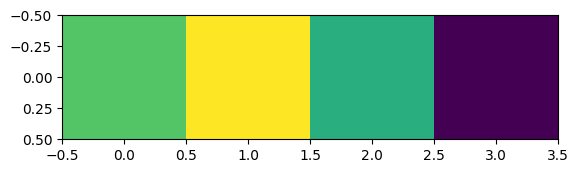

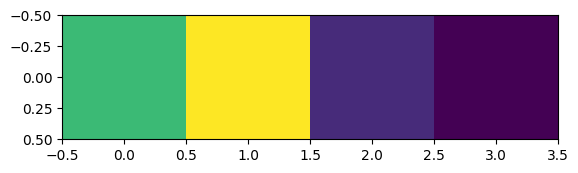

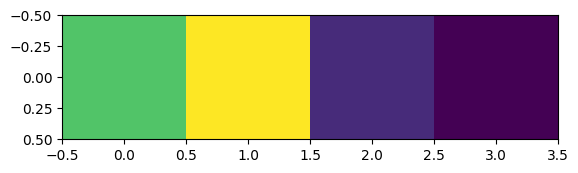

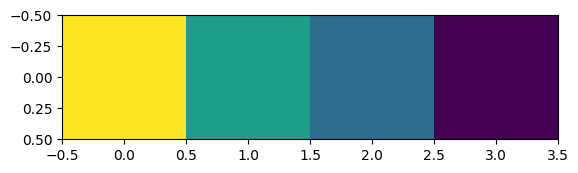

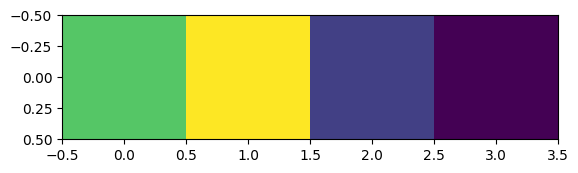

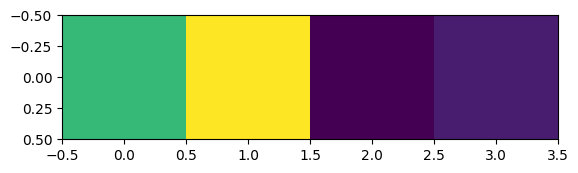

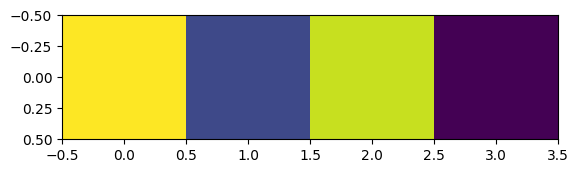

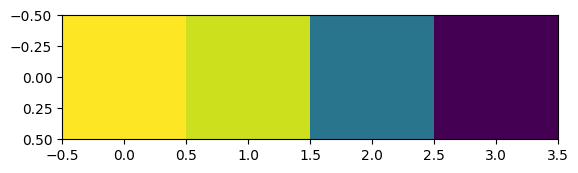

In [35]:
for x in X_trnrm[:26]:
    plt.imshow(np.expand_dims(x, axis=1).T) 
    plt.show()

#### Image histograms

In [36]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'labels'],
      dtype='object')

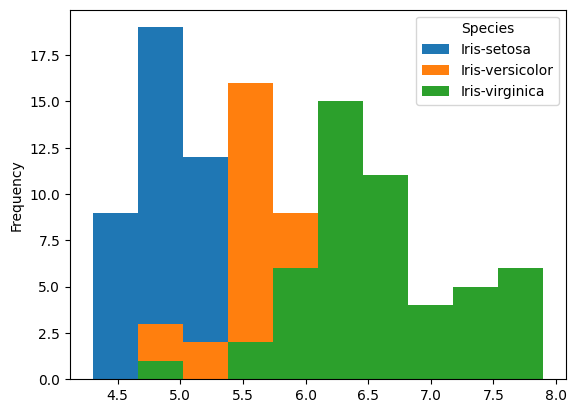

In [37]:
df.pivot(columns='Species', values='SepalLengthCm').plot.hist()
plt.show()

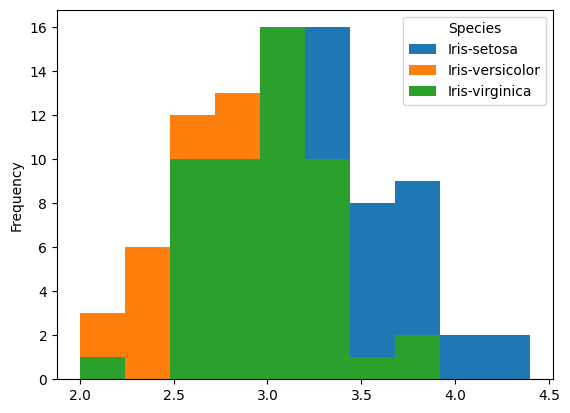

In [38]:
df.pivot(columns='Species', values='SepalWidthCm').plot.hist()
plt.show()

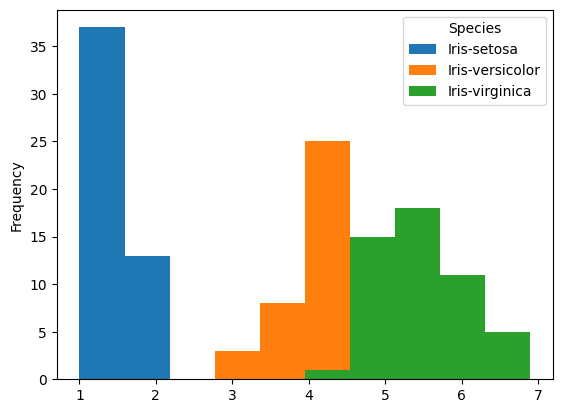

In [39]:
df.pivot(columns='Species', values='PetalLengthCm').plot.hist()
plt.show()

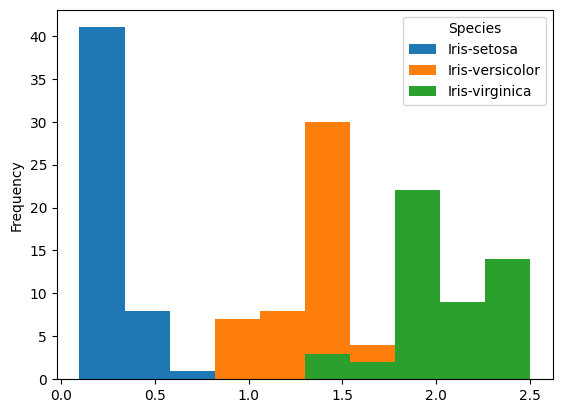

In [40]:
df.pivot(columns='Species', values='PetalWidthCm').plot.hist()
plt.show()

#### Image scatterplots

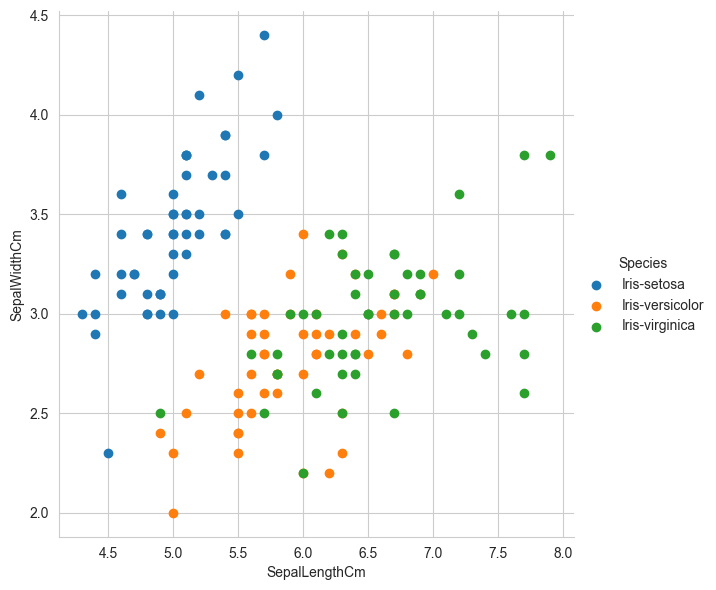

In [41]:
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="Species", 
              height = 6).map(plt.scatter, 
                              'SepalLengthCm', 
                              'SepalWidthCm').add_legend()

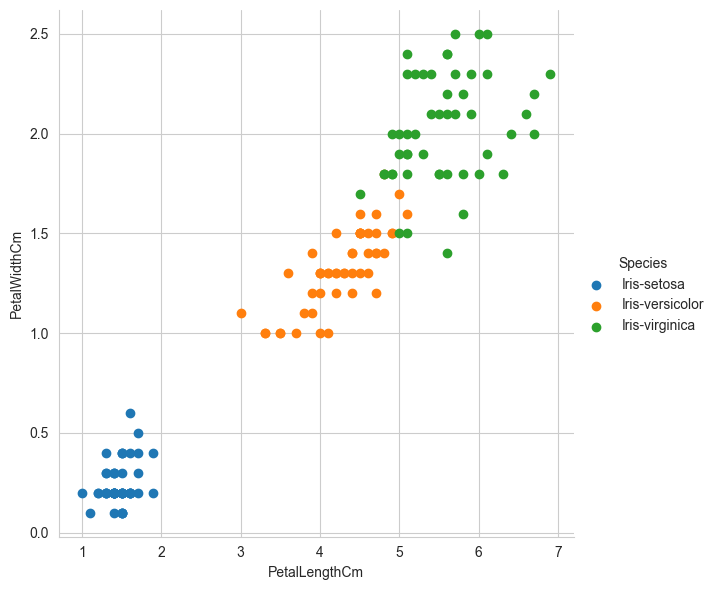

In [42]:
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="Species", 
              height = 6).map(plt.scatter, 
                              'PetalLengthCm', 
                              'PetalWidthCm').add_legend()

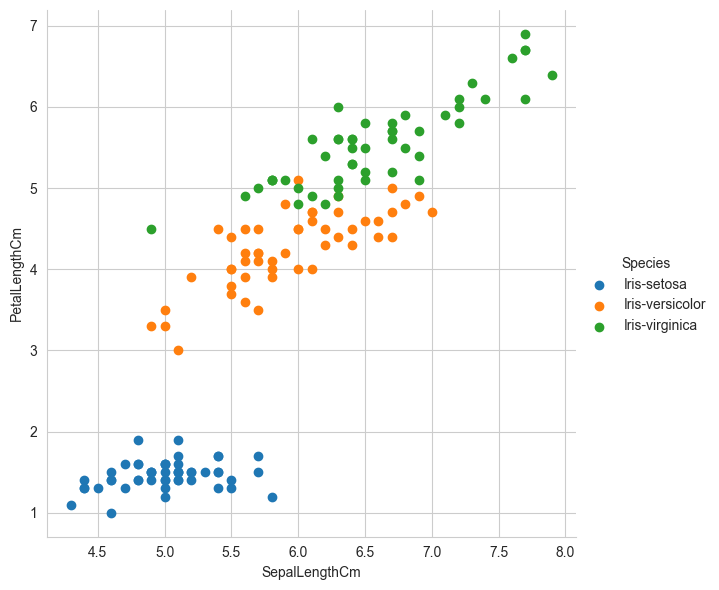

In [43]:
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="Species", 
              height = 6).map(plt.scatter, 
                              'SepalLengthCm',
                              'PetalLengthCm').add_legend()

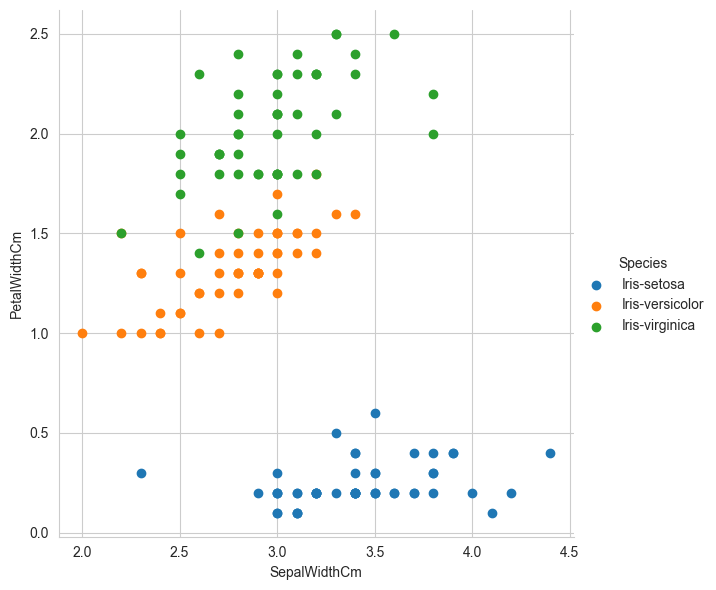

In [44]:
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="Species", 
              height = 6).map(plt.scatter, 
                              'SepalWidthCm',
                              'PetalWidthCm').add_legend()

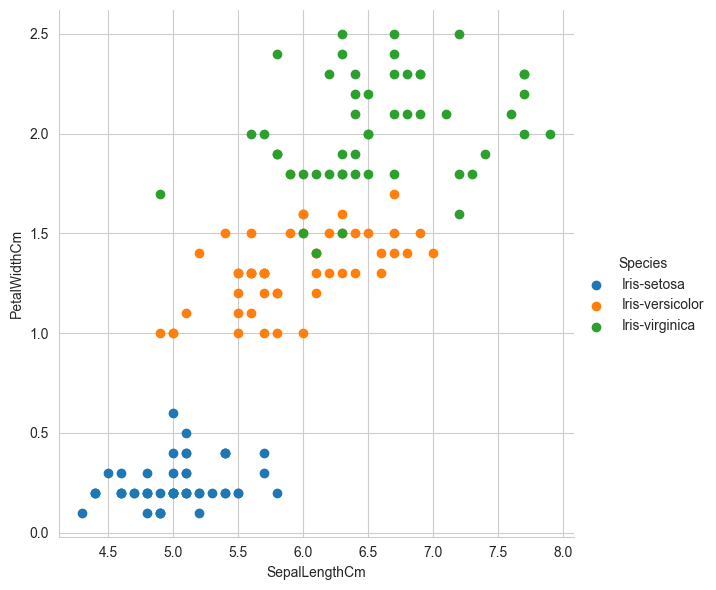

In [45]:
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="Species", 
              height = 6).map(plt.scatter, 
                              'SepalLengthCm',
                              'PetalWidthCm').add_legend()

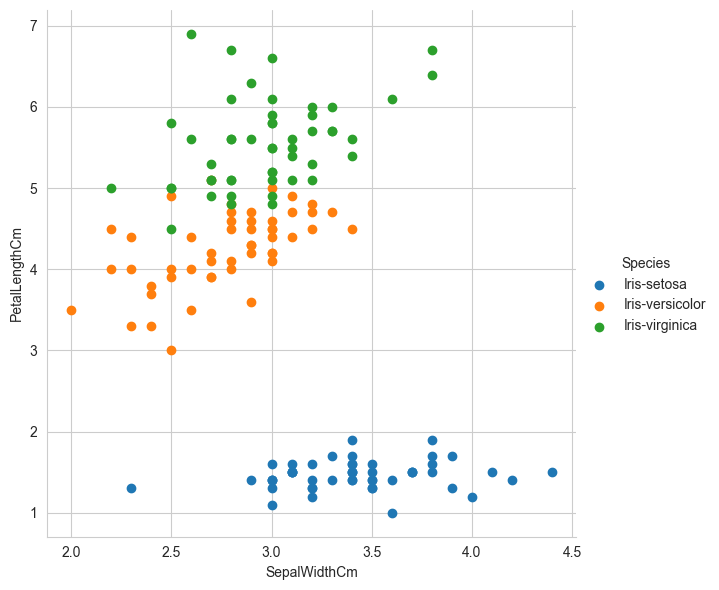

In [46]:
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="Species", 
              height = 6).map(plt.scatter, 
                              'SepalWidthCm',
                              'PetalLengthCm').add_legend()

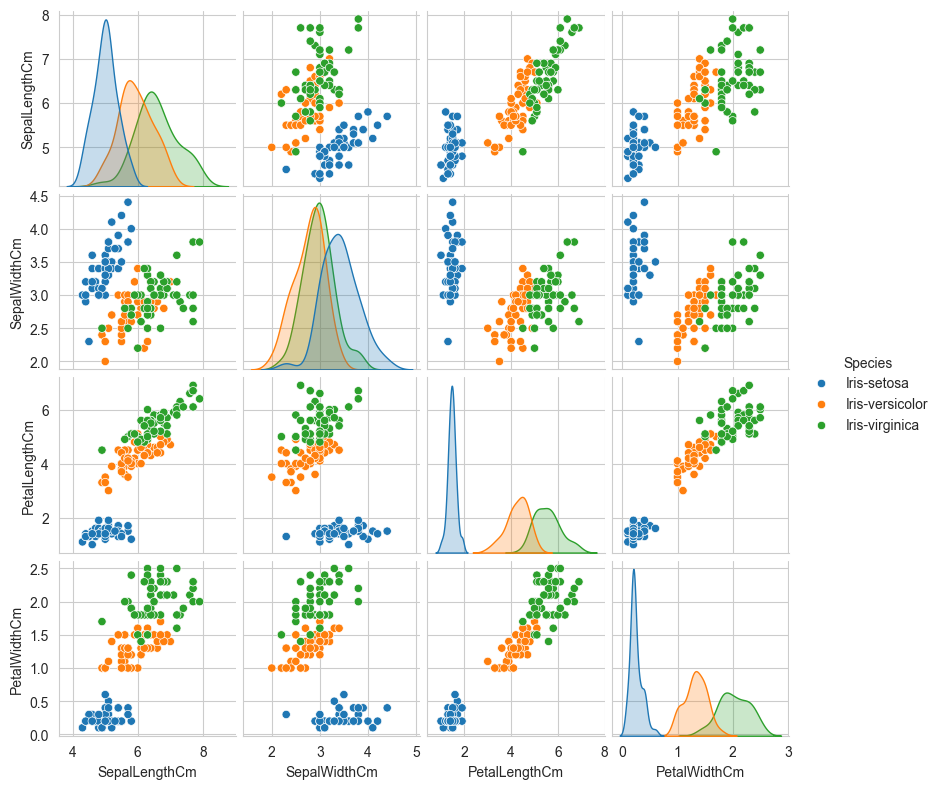

In [63]:
sns.pairplot(df.drop(['Id', 'labels'], axis=1), hue='Species', height=2)
plt.show()

#### 3d scatter plots

In [72]:
px.scatter_3d(df.drop(['Id', 'labels'], axis=1), 
              x="PetalLengthCm", 
              y="PetalWidthCm", 
              z="SepalLengthCm", 
              size="SepalWidthCm", 
              color="Species",
             )
#               color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

#### Try models

In [48]:
X_tenrm.shape, y_train.shape

((30, 4), (120,))

In [49]:
lgr = LogisticRegression(random_state=SEED, 
                         n_jobs=workers,
                         max_iter=1000)

In [50]:
y_train

16     0
140    2
104    2
124    2
89     1
      ..
36     0
27     0
128    2
96     1
136    2
Name: labels, Length: 120, dtype: int64

In [51]:
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=8, random_state=2024)

In [73]:
lgr.coef_

array([[-0.4758027 ,  0.82964055, -2.45005032, -0.97828632],
       [ 0.28820534, -0.1943664 , -0.23640577, -0.71599427],
       [ 0.18759736, -0.63527415,  2.68645609,  1.6942806 ]])

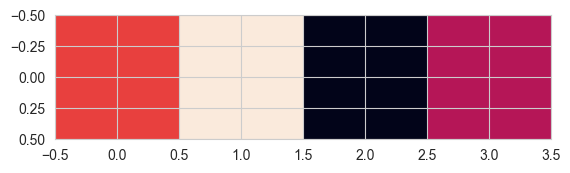

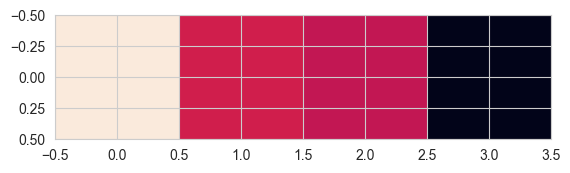

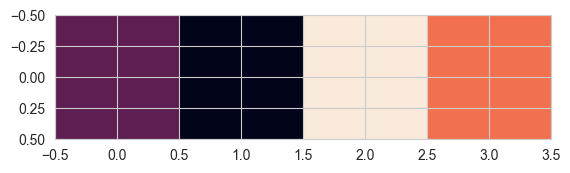

In [74]:
for cf in lgr.coef_:
    plt.imshow(np.expand_dims(cf, axis=1).T) 
    plt.show()
    

In [53]:
y_pred = lgr.predict(X_test)

In [54]:
y_pred, y_test.values

(array([0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2,
        2, 1, 0, 2, 1, 0, 2, 0]),
 array([0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2,
        2, 1, 0, 2, 2, 0, 2, 0]))

In [55]:
cr = classification_report(y_test, y_pred)

In [56]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.70      0.88      0.78         8
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.88      0.87      0.87        30



#### Try decision tree model

In [76]:
dtc = DecisionTreeClassifier(random_state=SEED)

In [77]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2024)

In [78]:
y_pred = dtc.predict(X_test)

In [79]:
y_pred, y_test.values

(array([0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2,
        2, 1, 0, 2, 1, 0, 2, 0]),
 array([0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2,
        2, 1, 0, 2, 2, 0, 2, 0]))

In [82]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.70      0.88      0.78         8
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.88      0.87      0.87        30



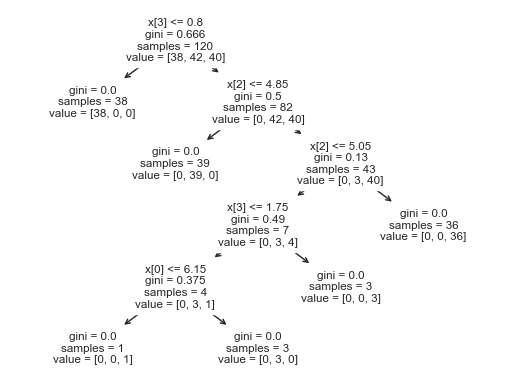

In [85]:
plot_tree(dtc)
plt.show()

#### Try random forest model

In [57]:
rfc = RandomForestClassifier(n_jobs=workers,
                            random_state=SEED)

In [58]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=8, random_state=2024)

In [59]:
y_pred = rfc.predict(X_test)

In [60]:
y_pred, y_test.values

(array([0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2,
        2, 1, 0, 2, 2, 0, 2, 0]),
 array([0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2,
        2, 1, 0, 2, 2, 0, 2, 0]))

In [80]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.70      0.88      0.78         8
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.88      0.87      0.87        30

